<h1>Logistic regression algorithms.<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Hypothesis</a></span></li><li><span><a href="#Cost-function" data-toc-modified-id="Cost-function-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cost function</a></span></li><li><span><a href="#Gradient-descent" data-toc-modified-id="Gradient-descent-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Gradient descent</a></span></li><li><span><a href="#Mutliclass-classification---one-vs.-all" data-toc-modified-id="Mutliclass-classification---one-vs.-all-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Mutliclass classification - one vs. all</a></span></li></ul></li><li><span><a href="#Logistic-regression-implementations" data-toc-modified-id="Logistic-regression-implementations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic regression implementations</a></span></li><li><span><a href="#Logistic-regression-examples" data-toc-modified-id="Logistic-regression-examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic regression examples</a></span><ul class="toc-item"><li><span><a href="#Plot-logistic-function" data-toc-modified-id="Plot-logistic-function-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot logistic function</a></span></li><li><span><a href="#Plot-cost-function" data-toc-modified-id="Plot-cost-function-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plot cost function</a></span></li></ul></li><li><span><a href="#Logistic-regression-examples" data-toc-modified-id="Logistic-regression-examples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logistic regression examples</a></span></li></ul></div>

# Logistic regression

n - number of features <br>
m - number of training examples <br>
$x^{(i)}$ - $i^{th}$ input variable <br>
$y^{(i)}$ - $i^{th}$ output variable

## Hypothesis

Parameters: <br>
&emsp; $\theta_0, \theta_1,... \theta_n = \theta$ <br><br>
Hypothesis: <br>
&emsp; $h_\theta(x) = g(\theta_0x_0+\theta_1x_1+...+\theta_nx_n) = g(\theta^Tx)$
&emsp; for $x_0=1$ <br>
&emsp; $z = \theta^Tx$ <br>
&emsp; $g(z) = \frac{1}{1+e^{-z}}$

## Cost function

Cost function: <br>
&emsp; $Cost(h_\theta(x),y) =\begin{cases}
    -log(h_\theta(x)) & \text{if y=1}\\
    -log(1-h_\theta(x)) & \text{if y=0}
\end{cases}$ <br>
&emsp; $Cost(h_\theta(x),y) = -ylog(h_\theta(x)) - (1-y)log(1-h_\theta(x))$ <br>
&emsp; $J(\theta) = \frac{1}{m} \sum \limits _{i=1} ^m Cost(h_\theta(x^{(i)}, y^{(i)})$ <br>
&emsp; $J(\theta) = -\frac{1}{m} \sum \limits _{i=1} ^m \big[y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1-h_\theta(x^{(i)})) \big]$ <br>
Vectorized cost function: <br>
&emsp; $h = g(X\theta)$ <br>
&emsp; $J(\theta) = \frac{1}{m} (-y^Tlog(h) - (1-y)^Tlog(1-h))$

## Gradient descent

$\alpha$ - learning rate <br><br>
Gradient descent algorithm: <br>
&emsp; $\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)$ <br>
&emsp; $\theta_j := \theta_j - \frac{\alpha}{m} \sum \limits _{i=1} ^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$ <br>
Vectorized gradient descent: <br>
&emsp; $\theta := \theta - \frac{\alpha}{m}X^T(g(X\theta) - y)$

## Mutliclass classification - one vs. all

$h_\theta^{(i)}(x) = P(y=i|x;\theta)$ &emsp; for $i \in \{0,1,..n\}$ <br><br>
$\begin{aligned}
   h_\theta^{(0)}(x) &= P(y=0|x;\theta) \\
   h_\theta^{(1)}(x) &= P(y=1|x;\theta) \\
   &\vdots\\
   h_\theta^{(n)}(x) &= P(y=n|x;\theta)
\end{aligned}$

# Logistic regression implementations

# Logistic regression examples

## Plot logistic function

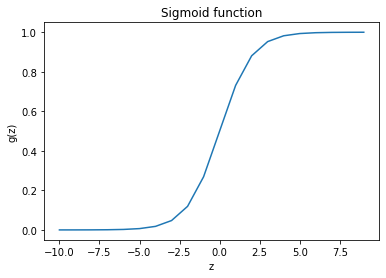

In [1]:
import numpy as np
from matplotlib import pyplot as plt

z_vals = np.arange(-10, 10)
g_vals = []

for z_val in z_vals:
    g_val = 1 / (1 + np.e**(-z_val))
    g_vals.append(g_val)
    
plt.title('Sigmoid function')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.plot(z_vals, g_vals)
plt.show()

$h_\theta(x)$ - estimated probability that y = 1 on input x <br><br>
$h_\theta(x) = P(y=1|x;\theta) = 1 - P(y=0|x;\theta)$ <br>
$P(y=0|x;\theta) + P(y=1|x;\theta) = 1$ <br><br>

$h_\theta(x) \geq 0.5 -> y=1$ <br>
$h_\theta(x) < 0.5 -> y=0$ <br><br>

$g(z) \geq 0.5$ when $z \geq 0 <=> \theta^Tx \geq 0$ <br>
$g(z) < 0.5$ when $z < 0 <=> \theta^Tx < 0$

## Plot cost function

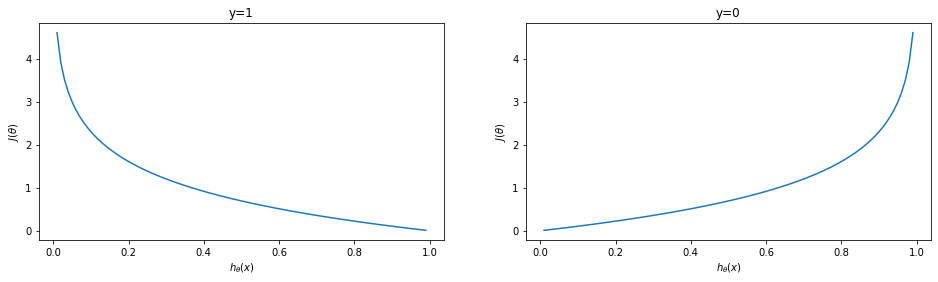

In [14]:
import numpy as np
from matplotlib import pyplot as plt

h_xs = np.arange(0.01, 1, 0.01)
J_vals = []

plt.figure(figsize=(16, 4))

# Ploting cost function for y=1
for h_x in h_xs:
    J = -np.log(h_x)
    J_vals.append(J)

plt.subplot(1, 2, 1)
plt.title('y=1')
plt.xlabel(r'$h_\theta(x)$')
plt.ylabel(r'$J(\theta)$')
plt.plot(h_xs, J_vals)

# Ploting cost function for y=0
J_vals = []
for h_x in h_xs:
    J = -np.log(1-h_x)
    J_vals.append(J)

plt.subplot(1, 2, 2)
plt.title('y=0')
plt.xlabel(r'$h_\theta(x)$')
plt.ylabel(r'$J(\theta)$')
plt.plot(h_xs, J_vals)

plt.show()

In [ ]:
Multiclass classification

In [ ]:
 regularyzacja jako osobny topic